<a href="https://colab.research.google.com/github/Blaze10/DL/blob/main/overfitting/crossvalidation_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from IPython import display
display.set_matplotlib_formats('svg')
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
iris = sns.load_dataset('iris')
data = torch.tensor(iris[iris.columns[:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 1

In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=.2)

train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

(torch.Size([120, 4]),
 torch.Size([30, 4]),
 torch.Size([120]),
 torch.Size([30]))

## Model

In [5]:
def createANNModel():
  ANNclassify = nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64, 3)
  )
  
  loss_fun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=.01)
  return ANNclassify, loss_fun, optimizer

In [7]:
num_epochs = 200

def train_model(train_prop):

  losses = torch.zeros(num_epochs)
  train_acc = []
  test_acc = []

  for epochi in range(num_epochs):

    X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=train_prop)

    yHat = ANNclassify(X_train)
    loss = loss_fun(yHat, y_train)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_acc.append(100 * torch.mean((torch.argmax(yHat, axis=1) == y_train).float()).item())
    test_yHat = ANNclassify(X_test)
    test_acc.append(100 * torch.mean((torch.argmax(test_yHat, axis=1) == y_test).float()).item())

  return losses, train_acc, test_acc

In [8]:
ANNclassify, loss_fun, optimizer = createANNModel()
losses, train_acc, test_acc = train_model(.8)

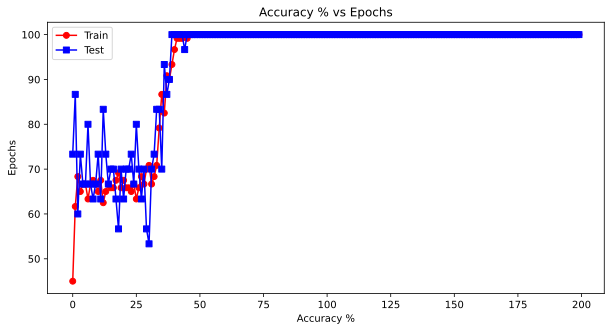

In [11]:
fig = plt.figure(figsize=(10, 5))
plt.plot(train_acc, 'ro-')
plt.plot(test_acc, 'bs-')
plt.ylabel('Epochs')
plt.xlabel('Accuracy %')
plt.title('Accuracy % vs Epochs')
plt.legend(['Train', 'Test'])
plt.show()

## Experiment

In [14]:
train_test_sizes = np.linspace(.2, .95, 10)
all_train_acc = np.zeros((len(train_test_sizes), num_epochs))
all_test_acc = np.zeros((len(train_test_sizes), num_epochs))

for i in range(len(train_test_sizes)):
  ANNclassify, loss_fun, optimizer = createANNModel()
  losses, train_acc, test_acc = train_model(train_test_sizes[i])

  all_train_acc[i, :] = train_acc
  all_test_acc[i, :] = test_acc

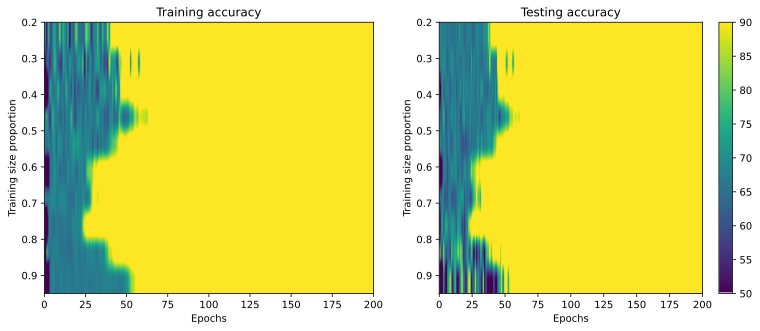

In [15]:
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].imshow(all_train_acc, aspect='auto', vmin=50, vmax=90, extent=[0, num_epochs, train_test_sizes[-1], train_test_sizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(all_test_acc, aspect='auto', vmin=50, vmax=90, extent=[0, num_epochs, train_test_sizes[-1], train_test_sizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Testing accuracy')
fig.colorbar(p, ax=ax[1])

plt.show()

The images above suggest that the training proportion doesn't really affect learning success (for this data and this
model). Does increasing the number of epochs to 1000 change the conclusion? How about with a lr=.001?

In [16]:
num_epochs = 1000
train_test_sizes = np.linspace(.2, .95, 10)
all_train_acc = np.zeros((len(train_test_sizes), num_epochs))
all_test_acc = np.zeros((len(train_test_sizes), num_epochs))

for i in range(len(train_test_sizes)):
  ANNclassify, loss_fun, optimizer = createANNModel()
  losses, train_acc, test_acc = train_model(train_test_sizes[i])

  all_train_acc[i, :] = train_acc
  all_test_acc[i, :] = test_acc

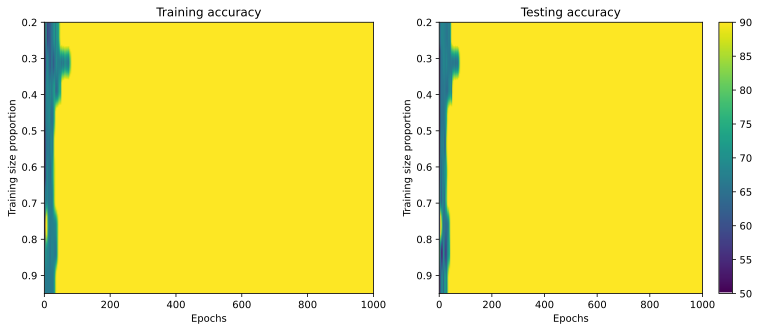

In [17]:
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].imshow(all_train_acc, aspect='auto', vmin=50, vmax=90, extent=[0, num_epochs, train_test_sizes[-1], train_test_sizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(all_test_acc, aspect='auto', vmin=50, vmax=90, extent=[0, num_epochs, train_test_sizes[-1], train_test_sizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Testing accuracy')
fig.colorbar(p, ax=ax[1])

plt.show()

In [18]:
def createANNModel():
  ANNclassify = nn.Sequential(
      nn.Linear(4,64),
      nn.ReLU(),
      nn.Linear(64,64),
      nn.ReLU(),
      nn.Linear(64, 3)
  )
  
  loss_fun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=.001)
  return ANNclassify, loss_fun, optimizer

In [19]:
num_epochs = 200
train_test_sizes = np.linspace(.2, .95, 10)
all_train_acc = np.zeros((len(train_test_sizes), num_epochs))
all_test_acc = np.zeros((len(train_test_sizes), num_epochs))

for i in range(len(train_test_sizes)):
  ANNclassify, loss_fun, optimizer = createANNModel()
  losses, train_acc, test_acc = train_model(train_test_sizes[i])

  all_train_acc[i, :] = train_acc
  all_test_acc[i, :] = test_acc

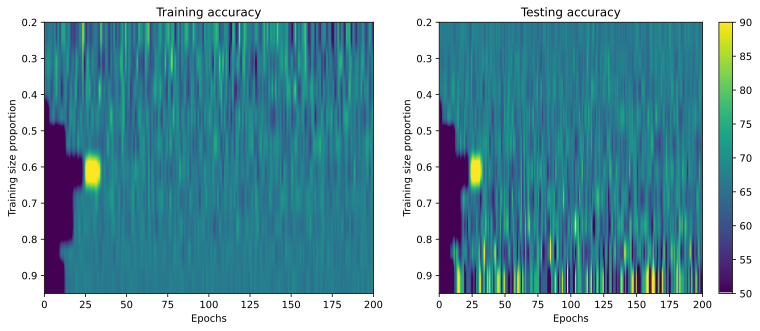

In [20]:
fig, ax = plt.subplots(1,2,figsize=(13,5))
ax[0].imshow(all_train_acc, aspect='auto', vmin=50, vmax=90, extent=[0, num_epochs, train_test_sizes[-1], train_test_sizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(all_test_acc, aspect='auto', vmin=50, vmax=90, extent=[0, num_epochs, train_test_sizes[-1], train_test_sizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Testing accuracy')
fig.colorbar(p, ax=ax[1])

plt.show()